# Exploring Titanic Dataset

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('titanic_data/train.csv')
df_test = pd.read_csv('titanic_data/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived: Survived (1) or died (0)

Pclass: Passenger’s class

Name: Passenger’s name

Sex: Passenger’s sex

Age: Passenger’s age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation

In [6]:
# Count survived
total_no_of_passengers = len(df_train['Survived'])

for group, frame in df_train.groupby('Survived'):
    print("Survived " + str(group) + " : " + str(len(frame)) + " "+ str(round(len(frame)*100/total_no_of_passengers,1)) + '%' )

Survived 0 : 549 61.6%
Survived 1 : 342 38.4%


In [7]:
for group, frame in df_train[['Sex']].groupby(['Sex'], as_index=False):
    print("{} : {}".format(group, len(frame)))

female : 314
male : 577


In [21]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


In [8]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [33]:
df_train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
df_train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\Users\mirta\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mirta\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


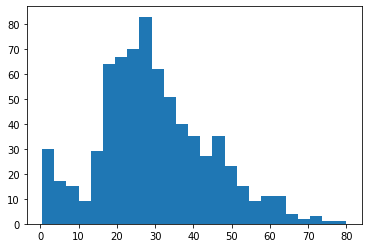

In [45]:
plt.figure()
_ = plt.hist(df_train['Age'], bins=25)

<Figure size 432x288 with 0 Axes>

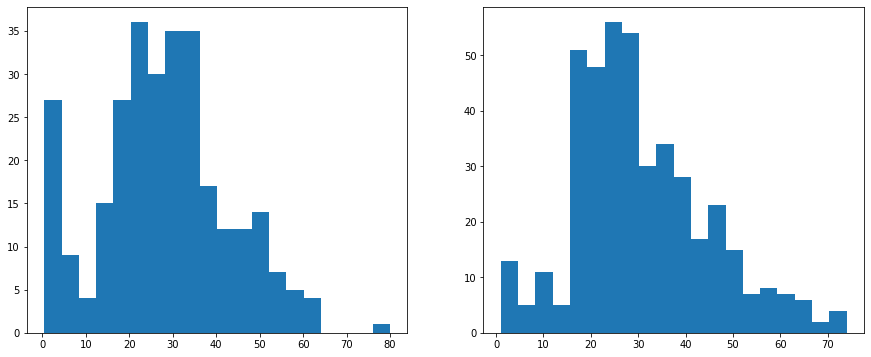

In [69]:
df_train_survived = df_train[['Age','Survived']].where(df_train['Survived']==1).dropna()
df_train_not_survived = df_train[['Age','Survived']].where(df_train['Survived']==0).dropna()
plt.figure()
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
_ = ax1.hist(df_train_survived['Age'], bins=20)

ax2 = plt.subplot(1,2,2)
_ = ax2.hist(df_train_not_survived['Age'], bins=20)

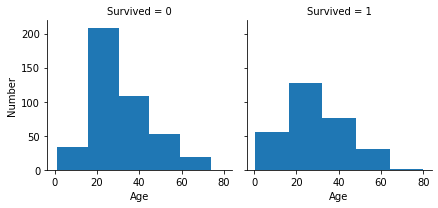

In [84]:
age_hist = sns.FacetGrid(df_train, col='Survived')
age_hist.map(plt.hist, 'Age', bins=5)
age_hist.set_ylabels('Number')

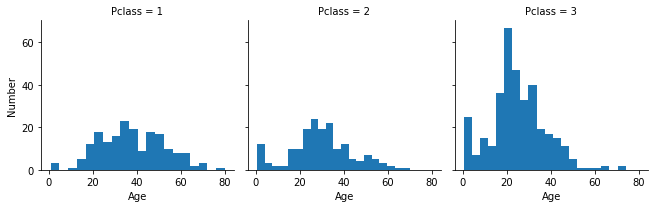

In [91]:
Pclass_hist = sns.FacetGrid(df_train, col='Pclass')
Pclass_hist.map(plt.hist, 'Age', bins=20)
Pclass_hist.set_ylabels('Number')

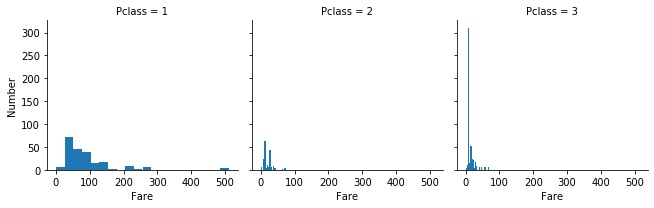

In [102]:
Pclass_hist = sns.FacetGrid(df_train, col='Pclass')
Pclass_hist.map(plt.hist, 'Fare', bins=20)
Pclass_hist.set_ylabels('Number')

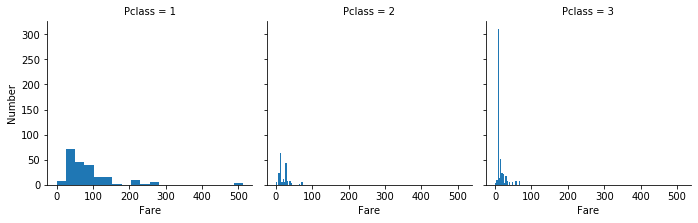

In [126]:
Pclass_hist = sns.FacetGrid(df_train, col='Pclass', height=3.2, aspect=1)
Pclass_hist.map(plt.hist, 'Fare', bins=20)
Pclass_hist.set_ylabels('Number')

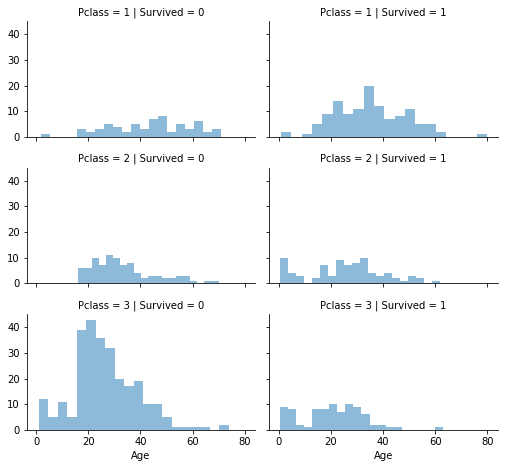

In [129]:
pclass_age_grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


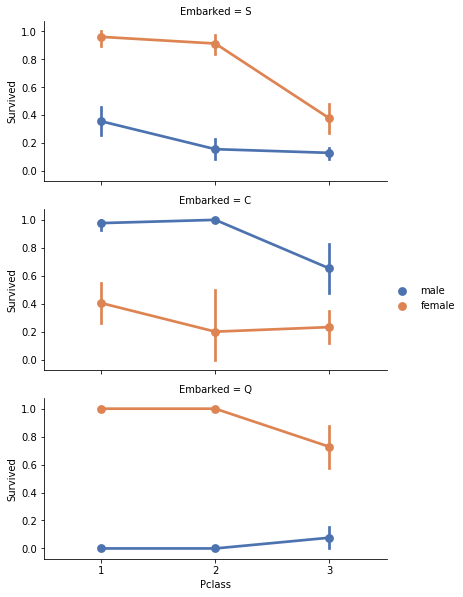

In [135]:
grid = sns.FacetGrid(df_train, row='Embarked', height=2.8, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


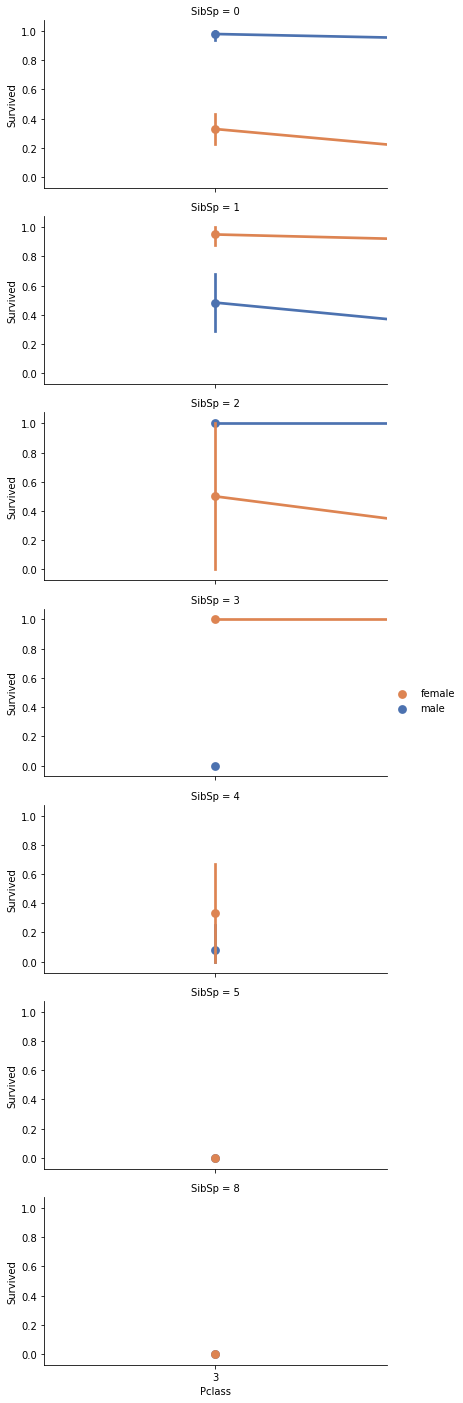

In [136]:
grid = sns.FacetGrid(df_train, row='SibSp', height=2.8, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Fare Analysis of passengers who survived based on Embarking Zone

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


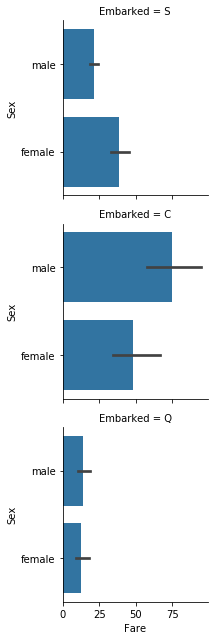

In [140]:
grid = sns.FacetGrid(df_train, row='Embarked')
grid.map(sns.barplot, 'Fare', 'Sex')
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


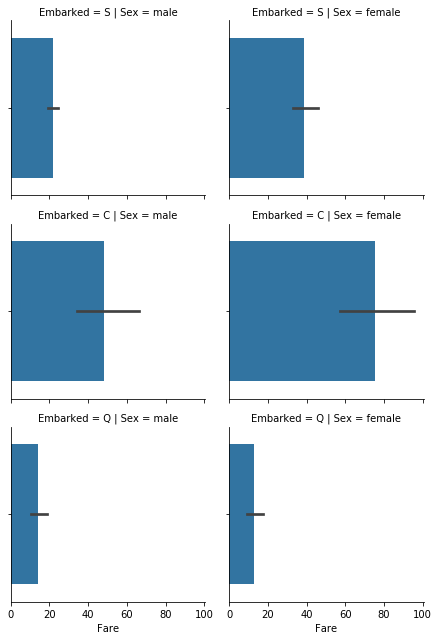

In [143]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Sex')
grid.map(sns.barplot, 'Fare')
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


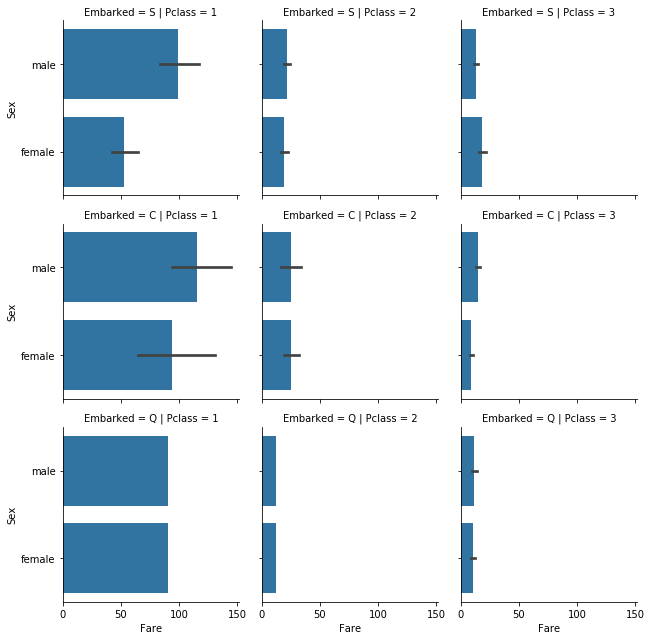

In [144]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Pclass')
grid.map(sns.barplot, 'Fare','Sex')
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


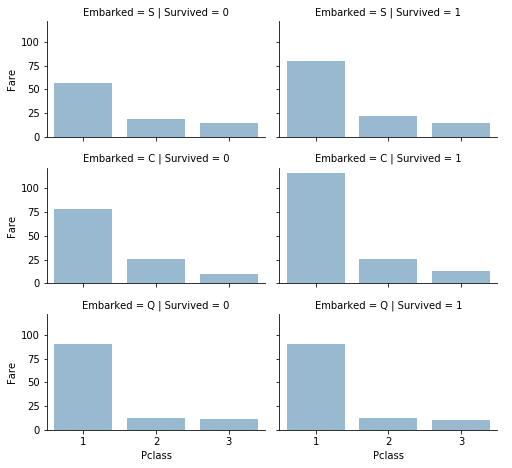

In [146]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


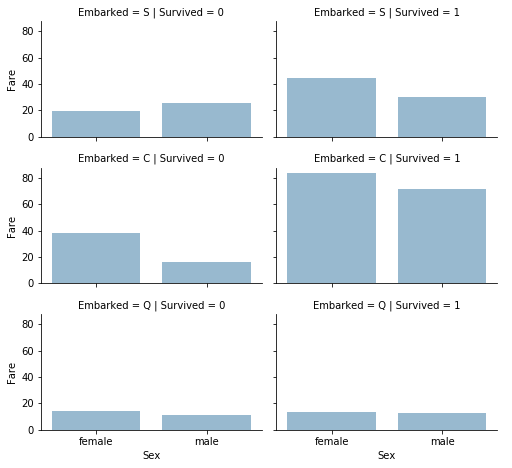

In [147]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mirta\Anaconda3\envs\Python 3.7\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


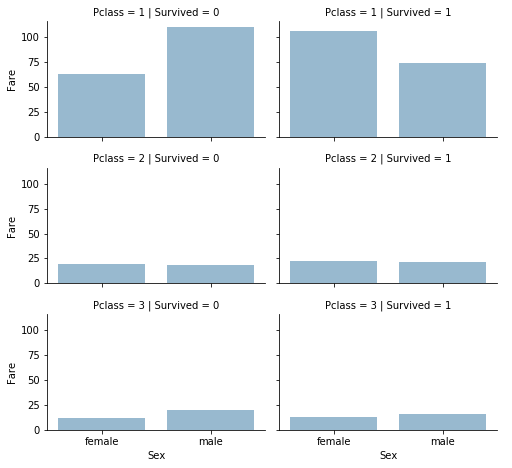

In [153]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [154]:

df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [155]:

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Dr','Major','Rev'],'Special')

df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royalty,0.600000
5,Special,0.277778
